To plot output emissions (direct - ED and total - ET) from TEAM-Kenya

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

In [19]:
# import technology data
technology = pd.read_csv(f'./../data/technology.csv')
technology

,TechID,ModeID,VehTypeID,MassCatID,FuelID,EngineID,TransTypeID,Availability,Final_Year,HybridFlag,spec_energ_consump,spec_energ_electric,noise_class,PurchasePrice,ExpectedLifeFactor,Capacity,AveEconLife,SecondHandImportFlag,note
0,10,1,2,4,1,10,1,1980,2000.0,0,6.57,NaN,0,5000.0,1,2.0,10,0,NaN
1,20,1,2,4,12,10,1,1995,2010.0,0,9.51,NaN,2,7000.0,1,2.0,10,0,NaN
2,25,1,2,4,12,11,1,2010,2020.0,0,8.38,NaN,2,6000.0,1,2.0,10,0,NaN
3,26,1,2,4,12,12,1,2020,NaN,0,7.18,NaN,2,5500.0,1,2.0,10,0,NaN
4,30,1,2,4,1,11,1,2000,2010.0,0,5.65,NaN,0,5000.0,1,2.0,10,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2241,14889,1,5,28,13,13,2,2033,2038.0,0,179.20,1.0,2,14000.0,1,2.5,10,1,NaN
2242,14890,1,5,28,13,13,2,2038,2043.0,0,153.89,1.0,2,12000.0,1,2.5,10,1,NaN
2243,14891,1,5,28,13,13,2,2043,2048.0,0,132.15,1.0,2,12000.0,1,2.5,10,1,NaN
2244,14892,1,5,28,13,13,2,2048,2053.0,0,113.48,1.0,2,12000.0,1,2.5,10,1,NaN


In [20]:
def load_data(scenario, emissions_type, purpose='scenario', attempt='BASE'):
    if purpose == 'calibration':
        emissions = pd.read_excel(f'./../calibration/attempts/attempt{attempt}/E{emissions_type}.xlsx')
    else:
        emissions = pd.read_excel(f'./../scenarios/data-out/{scenario}/E{emissions_type}.xlsx')
    return emissions

In [21]:
def run_plot(scenario, emissions_type, emissions):

    years = range(2012, 2051)

    vehtype_dict = {'Moto':[2], 'Car':[3], 'Bus':[4], 'Truck':[5], 'Train':[6], 'Ship':[7], 'Plane':[8], 'All':[2,3,4,5,6,7,8]}

    #vehtype_dict = {'Moto':[2], 'Car':[3], 'Bus':[4], 'Train':[6], 'Ship':[7], 'All':[2,3,4,6,7]}

    emissions_data = {}
    for vehtype in vehtype_dict:

        emissions_data[vehtype] = []

        for year in years:

            # just the vehtype
            annual_Data = emissions[(emissions['Year'] == year) & (emissions['EmissionID'] == 1) & (emissions['TechID'].isin(technology[technology['VehTypeID'].isin(vehtype_dict[vehtype])]['TechID']))]

            # emissions_data['new_petrol'].append(annual_Data[(annual_Data['TechID'] < 9000) & (annual_Data['FuelID'] == 1)][f'E{emissions_type}_Value'].sum())
            # emissions_data['SHI_petrol'].append(annual_Data[(annual_Data['TechID'] >= 9000) & (annual_Data['FuelID'] == 1)][f'E{emissions_type}_Value'].sum())
            # emissions_data['new_bev'].append(annual_Data[(annual_Data['TechID'] < 9000) & (annual_Data['FuelID'] == 12)][f'E{emissions_type}_Value'].sum())
            # emissions_data['SHI_bev'].append(annual_Data[(annual_Data['TechID'] >= 9000) & (annual_Data['FuelID'] == 12)][f'E{emissions_type}_Value'].sum())

            emissions_data[vehtype].append(annual_Data[f'E{emissions_type}_Value'].sum())


    # plot
    %matplotlib inline

    fig,ax = plt.subplots()

    clr_cnt = 0
    for data in emissions_data:

        ax.plot(years, emissions_data[data], label=data, color=sns.color_palette()[clr_cnt])

        clr_cnt += 1

    st_year = 2012
    ax.set_xlim(left=st_year, right=2050)
    ax.set_ylabel(f'tCO2')
    plt.legend()

    plt.title(f'E{emissions_type} - {scenario}')
    fig.savefig(f'./E{emissions_type} - {scenario}')
    fig.tight_layout()



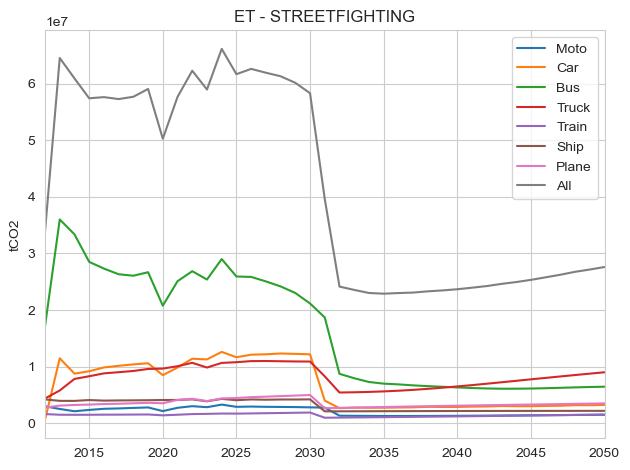

In [22]:
scenarios = ['OMOKA', 'ELECTRICDREAMS', 'KUJINAO', 'STREETFIGHTING']
emissions_types = ['D', 'T']

for emissions_type in emissions_types:
    for scenario in scenarios:

        emissions = load_data(scenario, emissions_type)

        run_plot(scenario, emissions_type, emissions)